# protospacer flanking sequences data exploration

In [3]:
# 05/07
# Made by L-F-S
# At the University Of Trento, Italy

import os

import sys
import pandas as pd
import matplotlib.pyplot as plt
from Bio import SeqIO
from Bio.Seq import Seq
# for clustal alignments
#from Bio import AlignIO
#from Bio.Align.Applications import ClustalwCommandline
#from Bio.Align import AlignInfo
# to make logos
import logomaker as lm

feature="Cas9" #WARNING!!! CHANGE THIS!!
datadir="/shares/CIBIO-Storage/CM/news/users/lorenzo.signorini/8pamsearch/out/"
seqid ="AJHGDLDC_00764"   # MANUAL INPUT
outdir=datadir+seqid+"/"


### Load file

In [159]:
PAM_dataset_name="dataset_flanking_sequences_of_putative_protospacers"
PAMdata=pd.read_csv(outdir+PAM_dataset_name, header=None)
PAMdata.head()

,0,1,2,3,4,5
0,NODE_1930_length_7783_cov_5.60675,TGACCTTGGCACGGCCGACATTCATGATGCCGCCGCCCGCACCGCC...,CCCAGCATGACCGAGTAGAAGATGATCTCCAGCCAGGGCACGCTGG...,AsnicarF_2017__MV_FEM4_t2Q15.contigs_filtered....,AsnicarF_2017__MV_FEM4_t2Q15__bin.24,TACATCGACATGAACAGCATACCGACGCTG
1,NODE_3807_length_5163_cov_11.0000_ID_96823,TGACCTTGGCACGGCCGACATTCATGATGCCGCCGCCCGCACCGCC...,CCCAGCATGACCGAGTAGAAGATGATCTCCAGCCAGGGCACGCTGG...,AsnicarF_2017__MV_FEM4_t2Q15_megahit.contigs_f...,0,TACATCGACATGAACAGCATACCGACGCTG
2,NODE_2216_length_7565_cov_2.67683,TGCGGGAGAAATTTCTCTGCCGCCGTGCGCAGTTCGGCAACGGTGG...,GCCGCTCTTGGCCGCTTGCAAGGGGACATCTTTCAGTGCTGTGGCC...,AsnicarF_2017__MV_FEM5_t1Q14.contigs_filtered....,0,GCGGCAAATCTGGCCGCCACACTGAAATTC
3,NODE_11024_length_2243_cov_3.21801,AAGACAAGCATTCCCTGGCTGGAAATCATCTTCTATGTCGCTATGA...,CCGCGGCGGCGCAGGCGGCGGCATCATGAATGTGGGCCGCGCCAAG...,AsnicarF_2017__MV_FEM5_t1Q14.contigs_filtered....,0,TACATCGACATGAACAGCATGCCGATGCTG
4,NODE_2410_length_7098_cov_3.4119,AAGACGAGCATTCCCTGGCTGGAGATCATCTTCTACGTCGCAATGA...,CCGCGGCGGCGCGGGCGGCGGCATCATGAATGTAGGCCGCGCCAAG...,AsnicarF_2017__MV_FEM5_t1Q14.contigs_filtered....,0,TACATCGACATGAACAACATACCGATGCTG


col0: contig, col1: upstream flanking sequence, col1: downtream flanking sequence, col3: samplename col4: bin (0 if unbinned)  col5: protospacer

In [10]:
PAMdata.shape

(7408, 6)

## Check length of flanking regions

count    7306.0
mean       51.0
std         0.0
min        51.0
25%        51.0
50%        51.0
75%        51.0
max        51.0
Name: 1, dtype: float64


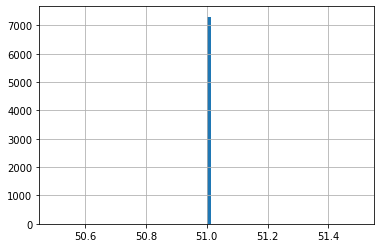

In [24]:
upstream_length=PAMdata[1].str.count("")
upstream_length.hist(bins=80)
print(upstream_length.describe())

Ma ci sn alcune righe senza dati, o con dati mancanti, o con dati mancanti, es:
 BackhedF_2015__SID130_M.contigs_filtered.fasta,    questo nel contig  NODE_16046_length_1718_cov_1.75827 non funge la seq upstream. esempio
 mentre BackhedF_2015__SID26_12M_megahit.contigs_filtered.fasta ha la seq DOWNStream corta (come accate ad altre), nel contig NODE_6634_length_2333_cov_7.0000_ID_14245
 altra downstream corta, x fare un dataset diverso: LawrenceA_2015__LD-Run2-11_megahit.contigs_filtered     NODE_1465_length_4048_cov_9.0000_ID_34458

In [31]:
PAMdata[PAMdata[3]=="BackhedF_2015__SID130_M.contigs_filtered.fasta"]

,0,1,2,3,4,5
18,NODE_16046_length_1718_cov_1.75827,NaN,TCGCCCACGTTCCAAATTTGCGAGGCAAAGTGCGCGGCCCGCCATG...,BackhedF_2015__SID130_M.contigs_filtered.fasta,0,GTGCCGATAAACTGCCCCTTGGAAATGGTG
19,NODE_12772_length_2188_cov_2.30286,CAATTTTTGTCCAGAACTCGGTACGATCCAGAGAAACACCTGACGG...,CTGTCCACGACAACGGTGTTTGCCTCGTACTGGCTGGTGATGTCCC...,BackhedF_2015__SID130_M.contigs_filtered.fasta,0,GGCTGCACGGAAAGATATGCGTTGCCGTTG
20,NODE_10241_length_2770_cov_2.19853,CAAGGGCGAAAGCCTCTAACGTTGCTGTGTATGTCGAACGCTGTGG...,AATCACAGATACCGTCGAGAAGATGATCGGCAAGAAGCAGCGCGTC...,BackhedF_2015__SID130_M.contigs_filtered.fasta,0,TCCCACTGCATATAATAGGGGTTTGCC
21,NODE_18192_length_1500_cov_2.0955,ACGGTCAGTGTTGAACACCGTCACACCGCCCGAGCCAAAGACCAGA...,GCGTCCATCGTACCATAGACACGGCCTCAAGAAATAGATACTTGCG...,BackhedF_2015__SID130_M.contigs_filtered.fasta,0,GCAAGCGGTTACTGGGCCACGTGTCGGGGA


In [34]:
print(PAMdata[1].shape,PAMdata[1].dropna().shape)

(7408,) (7306,)


### count how many upstream are different from 51


In [49]:
PAMdata[1].str.count("").value_counts()

51.0    7306
Name: 1, dtype: int64

they are all either 51 or none.

count    7389.000000
mean       50.643659
std         3.370080
min         2.000000
25%        51.000000
50%        51.000000
75%        51.000000
max        51.000000
Name: 2, dtype: float64


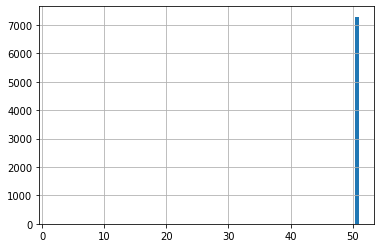

In [35]:
down_length=PAMdata[2].str.count("")
down_length.hist(bins=80)
print(down_length.describe())

In [42]:
# per il downstream:
PAMdata[PAMdata[3]=="LawrenceA_2015__LD-Run2-11_megahit.contigs_filtered.fasta"]

,0,1,2,3,4,5
2439,NODE_1634_length_3807_cov_6.7785_ID_29044,CAAGATCAATTTTTGCGATTCGGACCCCGTGACGGACAAGGCGTGG...,AGGTCCACAAACCGCAGGTCCTGCAAACCAACTACTACGGCCAGAC...,LawrenceA_2015__LD-Run2-11_megahit.contigs_fil...,0,CGTACATGTCCACGCTCTGGCCCTCTTCCA
2440,NODE_1465_length_4048_cov_9.0000_ID_34458,CCGGTCGGTATCAAATACCGTCACACCGCCATCCCCAAATACCAGG...,CAGTGTCCACCGCACCATGGAAA,LawrenceA_2015__LD-Run2-11_megahit.contigs_fil...,0,GCAAGCGGTTGCTGGGCCAGGTGTCGGG
2441,NODE_1429_length_4113_cov_6.8918_ID_44496,TCCGCAAGTACCTGTTTTTGGAGGCCATTTCCATGGTGCGGTGGAC...,AATACCTGGTATTTGGGGATGGCGGTGTAACGGTATTTGATACCGA...,LawrenceA_2015__LD-Run2-11_megahit.contigs_fil...,0,GCAAGCGGTTGCTGGGCCAGGTGTCGGG


In [47]:
es=PAMdata[PAMdata[3]=="LawrenceA_2015__LD-Run2-11_megahit.contigs_filtered.fasta"].iloc[1].iloc[2]
es

'CAGTGTCCACCGCACCATGGAAA'

In [48]:
#count how many downstream ar different from 51
PAMdata[2].str.count("").value_counts()

51.0    7289
31.0       9
32.0       6
26.0       5
18.0       5
13.0       4
12.0       4
15.0       4
3.0        3
5.0        3
30.0       3
28.0       3
22.0       3
44.0       3
39.0       3
37.0       3
27.0       3
10.0       3
35.0       2
19.0       2
33.0       2
42.0       2
2.0        2
48.0       2
16.0       2
6.0        2
23.0       2
17.0       2
29.0       1
14.0       1
47.0       1
24.0       1
4.0        1
49.0       1
45.0       1
21.0       1
41.0       1
46.0       1
34.0       1
38.0       1
7.0        1
Name: 2, dtype: int64

lots of shorter sequences, for protospacers close to the end of the contig.

How do you explain empty upstreams?
SOLVED: because of python indexing: example

In [56]:
astring=list(range(100))
start=0
end=9
a_downstream_substring_outisde=astring[90:150]
print(a_downstream_substring_outisde,": this prints out but is shorter")
an_upstream_substring_outisde=astring[-10:20], "this does not save")
print(an_upstream_substring_outisde)



[90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
[]


### extract sample names of the upstream mess :, and re run them
actually, some downstream messed up the same. must fis this and re run on faulty ones

In [100]:
#voglio 6 nt a valle (downstream) di protospacer AAAAAAAAAX: ne ho solo 5 (BBBBB)
l="AAAAAAAAAXBBBBZ"
end=10 # output da blast
#lo voglio lungo 50
print("my protospacer", l[:end])
print("last letter of protospacer", l[end-1])
last_pos=len(l)
print("last_pos",l[last_pos])
print("qll che faccio brutale è ", l[end:last_pos])
print("qll che prendo fino alla fine è ", l[end:last_pos])
print("qll che fingerà sarà ",l[end:last_pos]+"X"*(20-last_pos))

my protospacer AAAAAAAAAX
last letter of protospacer X


IndexError: string index out of range

In [ ]:
#ATTENZIONE ALLE UPSTREAM, vano allineate correttamente!!!!

In [160]:
#only downstream NAs:
PAMdata[PAMdata[2].isnull()].head(30)

,0,1,2,3,4,5
671,NODE_13093_length_2489_ID_160234,AAGACGAGCATTCCCTGGCTGGAGATCATCTTCTACGTCGCAATGA...,NaN,CM_madagascar__V19_01_2FE_megahit.contigs_filt...,0,TACATCGACATGAACAGCATACCAATGCTG
976,NODE_20707_length_1521_cov_4.0000_ID_77003,AAGACCAGCGTGCCCTGGCTGGAGATCATCTTCTATGTGGCGATGA...,NaN,CosteaPI_2017__SID713A068-11-0-0_megahit.conti...,0,GACATGAACAGCATACCGATGCTG
1862,NODE_16669_length_1388_cov_4.0000_ID_9273,AAGACGAGCATTCCCTGGCTGGAGATCATCTTCTACGTCGCAATGA...,NaN,HMP_2012__SRS047044_megahit.contigs_filtered.f...,0,TCGACATGAACAGCATACCGATGCTG
2572,NODE_6448_length_5267_cov_2.06946,CAGAGGACATTTGTTTTTGCGGGTACTTTGGGCGGTGGAAACGATA...,NaN,LeChatelierE_2013__MH0187.contigs_filtered.fasta,0,ACCTCATACATTGCCCTTATGAATTCCACT
3464,NODE_25369_length_1344_cov_2.0000_ID_68765,TGACCTTGGCGCGGCCCACATTCATGATGCCGCCGCCCGCGCCGCC...,NaN,LiJ_2017__nHM512834_megahit.contigs_filtered.f...,0,TACATCGACATGAACAGCATACCGATG
3702,NODE_53575_length_1038_cov_3.62157,TGACCTTGGCGCGGCCCACATTCATGATGCCGCCGCCTGCGCCGCC...,NaN,LiuW_2016__SRR3993013.contigs_filtered.fasta,0,TACATCGACATGAACAGCATAC
3907,NODE_8164_length_2192_cov_7.0000_ID_76094,TGACCTTGGCACGGCCGACATTCATGATGCCGCCGCCCGCACCGCC...,NaN,LoombaR_2017__SID5627_irb_megahit.contigs_filt...,0,TACATCGACATGAACAGCATACCGA
3969,NODE_14596_length_1443_cov_2.76657,AAGACGAGCATTCCCTGGCTGGAGATCATCTTCTATGTGGCAATGA...,NaN,LouisS_2016__AS66_24.contigs_filtered.fasta,0,ACATCGACATGAACAGCATGCCGATGCTG
4397,NODE_7526_length_1603_cov_4.0000_ID_26836,TAGACGGCCCATATATATTTAAAATAGGAATACAATTCTCACTATT...,NaN,QinJ_2012__CON-064_megahit.contigs_filtered.fasta,0,ACCTCATACATTGCCCTTATGAATTCCA
4660,NODE_25563_length_1538_cov_2.37761,AAGACGAGCATTCCCTGGCTGGAGATCATCTTCTACGTCGCAATGA...,NaN,QinJ_2012__T2D-043.contigs_filtered.fasta,0,ATCGACATGAACAGCATACCGATGCTG


In [105]:


PAMdata[PAMdata[2].isnull()].shape

(19, 6)

All NaN downstream seem to be (after checking) of protospacers who end exactly at the last position, we will therefore remove all the downstream Nans from downstream computations

In [108]:
# the same for upstream nans:
PAMdata[PAMdata[1].isnull()].shape

(102, 6)

In [111]:
PAMdata[PAMdata[1].isnull()].head(20)

,0,1,2,3,4,5
18,NODE_16046_length_1718_cov_1.75827,NaN,TCGCCCACGTTCCAAATTTGCGAGGCAAAGTGCGCGGCCCGCCATG...,BackhedF_2015__SID130_M.contigs_filtered.fasta,0,GTGCCGATAAACTGCCCCTTGGAAATGGTG
172,NODE_25600_length_2395_cov_2.39402,NaN,CCGCGGCGGCGCAGGCGGCGGCATCATGAATGTGGGCCGCGCCAAG...,BengtssonPalmeJ_2015__TRAVELRES10.contigs_filt...,0,TACATCGACATGAACAGCATACCGATGCTG
185,NODE_26470_length_1714_cov_7.0000_ID_138340,NaN,CCGATCATTGCGACGTAGAAGATGATCTCCAGCCAGGGAATGCTCG...,BengtssonPalmeJ_2015__TRAVELRES20_megahit.cont...,0,TACATCGACATGAACAGCATACCGATGCTG
256,NODE_32371_length_2015_cov_9.0000_ID_210924,NaN,CCCAGCATGACCGAGTAGAAGATGATCTCCAGCCAGGGCACACTGG...,BengtssonPalmeJ_2015__TRAVELRES4_megahit.conti...,0,ACATCGACATGAACAGCATACCGACGCTG
293,NODE_55124_length_1192_cov_2.38522,NaN,CCGAGCATTGCGACGTAGAAGATGATCTCCAGCCAGGGAATGCTCG...,BengtssonPalmeJ_2015__TRAVELRES9.contigs_filte...,0,TACATCGACATGAACAGCATACCGATGCTG
298,NODE_4044_length_5273_cov_45.0000_ID_126029,NaN,CCGATCATTGCGACGTAGAAGATGATCTCCAGCCAAGGAATGCTCG...,BritoIL_2016__M1.23.ST_megahit.contigs_filtere...,0,TACATCGACATGAACAGCATACCGATGCTG
353,NODE_12196_length_2776_cov_6.0000_ID_96776,NaN,CTGTCCACCACAACGGTATTAGCTTCGTACTGGCTGGTGATGTCCC...,BritoIL_2016__W1.6.ST_megahit.contigs_filtered...,0,GGCTGCACGGAAAGATAGGCGTTGCCGTTG
396,NODE_21608_length_1773_cov_39.0000_ID_214994,NaN,CCCAGCATGACCGAGTAGAAGATGATCTCCAACCAGGGCACGCTGG...,BritoIL_2016__WL.8.ST_megahit.contigs_filtered...,0,TACATCGACATGAACAGCATACCGACGCTG
449,NODE_3348_length_8230_cov_7.60416,NaN,CCAATCATTGCGACGTAGAAGATGATCTCCAGCCAGGGAATGCTCG...,CM_madagascar__A09_02_1FE.contigs_filtered.fasta,0,TACATCGACATGAACAGCATACCGATGCTG
509,NODE_4117_length_3592_ID_71743,NaN,CCGCGGCGGTGCGGGCGGCGGCATCATGAATGTCGGCCGTGCCAAG...,CM_madagascar__A39_01_1FE_megahit.contigs_filt...,0,TACATCGACATGAACAGCATACCGACGCTG


# ATTENZIONE  BritoIL_2016__W1.6.ST_megahit  contig  NODE_12196_length_2776_cov_6.0000_ID_96776  ha DUE PROTOSPACER SULLO STESSO CONTIG. bisognerà aggiungere righe

In [74]:
all_samples=PAMdata[3]
print(PAMdata.shape)
newdata=PAMdata[PAMdata.isnull().any(1)]
print(newdata.shape)
bad_samples=newdata[3]
print(bad_samples)
bad_samples.to_csv(datadir+"samples_to_rerun.csv", index=None)


(7408, 6)
(121, 6)
18         BackhedF_2015__SID130_M.contigs_filtered.fasta
172     BengtssonPalmeJ_2015__TRAVELRES10.contigs_filt...
185     BengtssonPalmeJ_2015__TRAVELRES20_megahit.cont...
256     BengtssonPalmeJ_2015__TRAVELRES4_megahit.conti...
293     BengtssonPalmeJ_2015__TRAVELRES9.contigs_filte...
                              ...                        
7141    ZeeviD_2015_B__PNP_Main_96_megahit.contigs_fil...
7206    ZellerG_2014__CCIS16383318ST-4-0.contigs_filte...
7219    ZellerG_2014__CCIS33816588ST-4-0_megahit.conti...
7231    ZellerG_2014__CCIS41222843ST-4-0_megahit.conti...
7232    ZellerG_2014__CCIS41222843ST-4-0_megahit.conti...
Name: 3, Length: 121, dtype: object


/home/lorenzo.signorini/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  import sys


In [ ]:
# da fare: se sono downstream:
aggiungi una cosa che riempie le downstream con il valore piu comune (non voglio dropparle xke perderei gli upstream)
#se sn up corti:
sostituisci le x con le cose piu comuni per i downstrea,

## temporaneamente:

In [115]:
#
#per ora let us drop those lines
PAMdata=PAMdata.dropna()
PAMdata.shape

(7287, 6)

# Sequence logos

In [ ]:
#versione dataset:


In [ ]:
# This must take as input a dictionary of tuples
# with flanking regions for all porotspacers. How do we enlarge the dictionary now? 
# Maybe instead of a dictionary we write a little file: 
# col0: contigname (of target contig with protospacer) 
# col1: upstream seq, col2: downstream sequence col3: samplename (old, epasolli), 
# col4: bin name if binned (old, epasolli), otherwise 0 (NOT USED IN CODE BELOW YET) 
#  col5: PROTOSPACER sequence
# so all this code below in this box will probly be obsolete

all_flanking_sequences=open(outdir+all_flanking_file,"r")
upstream_seqs, downstream_seqs, upstream_seqs_rvc, downstream_seqs_rvc, = [],[],[],[]
for line in all_flanking_sequences.readlines():
  #  target_contig=line.strip("\n").split(",")[0]
    up_in_cont=line.strip("\n").split(",")[1]
    down_in_cont=line.strip("\n").split(",")[2]
   # cont_sample=line.strip("\n").split(",")[3]
    upstream_seqs.append(up_in_cont)
    upstream_seqs_rvc.append(str(Seq(up_in_cont).reverse_complement()))
    downstream_seqs.append(down_in_cont)
    downstream_seqs_rvc.append(str(Seq(down_in_cont).reverse_complement()))
f.close()

In [126]:
#Upstream:
counts_mat = lm.alignment_to_matrix(PAMdata[1])
counts_mat.to_csv(outdir+"upstream.pileup")
counts_mat.head()

,A,C,G,T
pos,,,,
0,3036.0,1102.0,435.0,2714.0
1,3303.0,1050.0,2306.0,628.0
2,3017.0,318.0,3246.0,706.0
3,2896.0,2356.0,1794.0,241.0
4,347.0,5346.0,1100.0,494.0


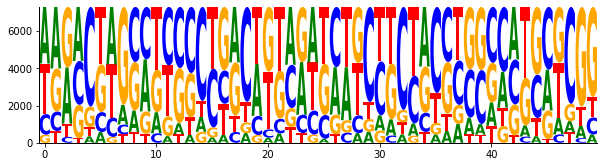

In [127]:
logo=lm.Logo(counts_mat,shade_below=.5,fade_below=.5)
logo.style_spines(visible=False)
logo.style_spines(spines=['left', 'bottom'], visible=True)
#plt.savefig(seqid+"upstream.logo1.pdf")

In [123]:
#downstream:
# 1: remove strings with different length:
downstream=PAMdata[2]
downstream_only_length=downstream[downstream.str.count("")==51]
counts_mat = lm.alignment_to_matrix(downstream_only_length)
counts_mat.to_csv(outdir+"downv1.pileup")
counts_mat.head()

,A,C,G,T
pos,,,,
0,1165.0,4764.0,873.0,385.0
1,1128.0,5211.0,251.0,597.0
2,549.0,843.0,5101.0,694.0
3,2643.0,3050.0,465.0,1029.0
4,384.0,1424.0,3385.0,1994.0


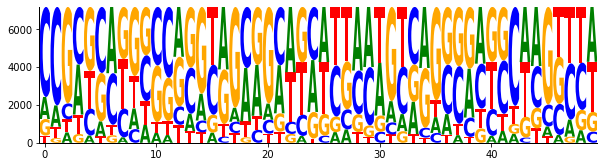

In [125]:
logo=lm.Logo(counts_mat,shade_below=.5,fade_below=.5)
logo.style_spines(visible=False)
logo.style_spines(spines=['left', 'bottom'], visible=True)
#plt.savefig(seqid+"downstream.logo1.pdf")

###  try filtering out binned ones..

In [140]:
PAMdata_unbinned=PAMdata[PAMdata[4]=="0"]
print(PAMdata_unbinned.head)
print(PAMdata_unbinned.shape)

<bound method NDFrame.head of                                                 0  \
1      NODE_3807_length_5163_cov_11.0000_ID_96823   
2               NODE_2216_length_7565_cov_2.67683   
3              NODE_11024_length_2243_cov_3.21801   
4                NODE_2410_length_7098_cov_3.4119   
5      NODE_3159_length_5263_cov_5.0000_ID_142944   
...                                           ...   
7402           NODE_28911_length_1635_cov_7.33101   
7403    NODE_93_length_49890_cov_78.3073_ID_65529   
7404  NODE_27203_length_1784_cov_23.0000_ID_99822   
7406   NODE_6850_length_5074_cov_28.3709_ID_58195   
7407   NODE_28347_length_1393_cov_6.0000_ID_71083   

                                                      1  \
1     TGACCTTGGCACGGCCGACATTCATGATGCCGCCGCCCGCACCGCC...   
2     TGCGGGAGAAATTTCTCTGCCGCCGTGCGCAGTTCGGCAACGGTGG...   
3     AAGACAAGCATTCCCTGGCTGGAAATCATCTTCTATGTCGCTATGA...   
4     AAGACGAGCATTCCCTGGCTGGAGATCATCTTCTACGTCGCAATGA...   
5     TGCGGGAGAAATTTCTCTGCCGCCGTGCGCAG

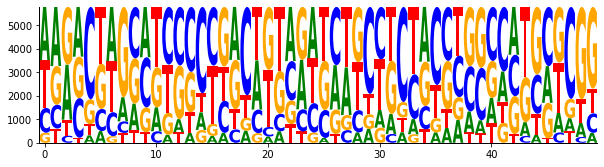

In [142]:
#redo the same stuff
#Upstream:
counts_mat = lm.alignment_to_matrix(PAMdata_unbinned[1])
counts_mat.to_csv(outdir+"upstream1.pileup")
counts_mat.head()
logo=lm.Logo(counts_mat,shade_below=.5,fade_below=.5)
logo.style_spines(visible=False)
logo.style_spines(spines=['left', 'bottom'], visible=True)

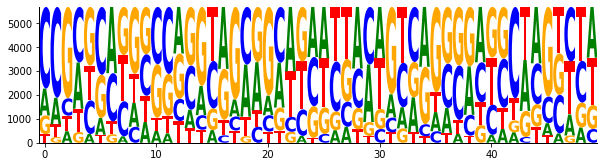

In [143]:
#downstream:
# 1: remove strings with different length:
downstream=PAMdata_unbinned[2]
downstream_only_length=downstream[downstream.str.count("")==51]
counts_mat = lm.alignment_to_matrix(downstream_only_length)
counts_mat.to_csv(outdir+"downv1.pileup")
counts_mat.head()
logo=lm.Logo(counts_mat,shade_below=.5,fade_below=.5)
logo.style_spines(visible=False)
logo.style_spines(spines=['left', 'bottom'], visible=True)

## Inspect ciò che è diverso da quello ceh mi aspetterei. Sono (ad es) tutti di HMP_2012?

In [153]:
Only_downstream_PAM=PAMdata[PAMdata[2].str.startswith("CCG")]

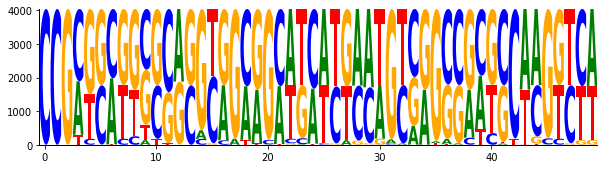

In [154]:
#downstream:
# 1: remove strings with different length:
downstream=Only_downstream_PAM[2]
downstream_only_length=downstream[downstream.str.count("")==51]
counts_mat = lm.alignment_to_matrix(downstream_only_length)
counts_mat.head()
logo=lm.Logo(counts_mat,shade_below=.5,fade_below=.5)
logo.style_spines(visible=False)
logo.style_spines(spines=['left', 'bottom'], visible=True)

In [155]:
# much more polished.. let's see the upstream just for fun:

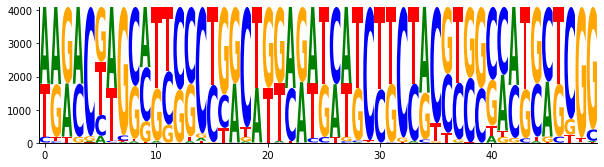

In [156]:
#Upstream:
counts_mat = lm.alignment_to_matrix(Only_downstream_PAM[1])
counts_mat.to_csv(outdir+"upstream1.pileup")
counts_mat.head()
logo=lm.Logo(counts_mat,shade_below=.5,fade_below=.5)
logo.style_spines(visible=False)
logo.style_spines(spines=['left', 'bottom'], visible=True)

In [157]:
# much more polished as wwell..too much. it's the reverse complement. What is going on here..

In [152]:
Not_with_downstream_PAM

,0,1,2,3,4,5
3,NODE_11024_length_2243_cov_3.21801,AAGACAAGCATTCCCTGGCTGGAAATCATCTTCTATGTCGCTATGA...,CCGCGGCGGCGCAGGCGGCGGCATCATGAATGTGGGCCGCGCCAAG...,AsnicarF_2017__MV_FEM5_t1Q14.contigs_filtered....,0,TACATCGACATGAACAGCATGCCGATGCTG
4,NODE_2410_length_7098_cov_3.4119,AAGACGAGCATTCCCTGGCTGGAGATCATCTTCTACGTCGCAATGA...,CCGCGGCGGCGCGGGCGGCGGCATCATGAATGTAGGCCGCGCCAAG...,AsnicarF_2017__MV_FEM5_t1Q14.contigs_filtered....,0,TACATCGACATGAACAACATACCGATGCTG
6,NODE_5910_length_3325_cov_6.8221_ID_120246,AAGACGAGCATTCCCTGGCTGGAGATCATCTTCTACGTCGCAATGA...,CCGCGGCGGCGCGGGCGGCGGCATCATGAATGTAGGCCGCGCCAAG...,AsnicarF_2017__MV_FEM5_t1Q14_megahit.contigs_f...,0,TACATCGACATGAACAACATACCGATGCTG
7,NODE_5649_length_3444_cov_6.7016_ID_139043,AAGACAAGCATTCCCTGGCTGGAAATCATCTTCTATGTCGCTATGA...,CCGCGGCGGCGCAGGCGGCGGCATCATGAATGTGGGCCGCGCCAAG...,AsnicarF_2017__MV_FEM5_t1Q14_megahit.contigs_f...,0,TACATCGACATGAACAGCATGCCGATGCTG
8,NODE_303_length_31921_cov_6.68377,CCTGGGCCACAGCACTGAAAGATGTCCCCTTGCAAGCGGCCAAGAG...,CCGCCCACCGTTGCCGAACTGCGCACGGCGGCAGAGAAATTTCTCC...,AsnicarF_2017__MV_FEM5_t2Q14.contigs_filtered....,0,GCGGCAAATCTGGCCGCCACACTGAAATTC
...,...,...,...,...,...,...
7402,NODE_28911_length_1635_cov_7.33101,TGACCTTGGCGCGGCCGACATTCATGATGCCGCCGCCTGCACCGCC...,CCGATCATCGCCACATAGAAGATGATCTCCAGCCAGGGCACGCTGG...,ZellerG_2014__MMPU84450604ST.contigs_filtered....,0,TACATCGACATGAACAGCATACCAATGCTG
7403,NODE_93_length_49890_cov_78.3073_ID_65529,AAGACGAGCATTCCCTGGCTGGAGATCATCTTCTACGTCGCAATGA...,CCGCGGCGGCGCGGGCGGCGGCATCATGAATGTGGGCCGCGCCAAG...,ZellerG_2014__MMPU84450604ST_megahit.contigs_f...,0,TACATCGACATGAACAGCATACCGATGCTG
7404,NODE_27203_length_1784_cov_23.0000_ID_99822,AAGACCAGCGTGCCCTGGCTGGAGATCATCTTCTATGTGGCGATGA...,CCGCGGCGGTGCAGGCGGCGGCATCATGAATGTCGGCCGCGCCAAG...,ZellerG_2014__MMPU84450604ST_megahit.contigs_f...,0,TACATCGACATGAACAGCATACCAATGCTG
7405,NODE_13899_length_2470_cov_8.83354,AAGACGAGCATTCCCTGGCTGGAGATCATCTTCTACGTCGCAATGA...,CCGCGGCGGCGCGGGCGGCGGCATCATGAATGTGGGCCGCGCCAAG...,ZellerG_2014__MMPU99077057ST.contigs_filtered....,ZellerG_2014__MMPU99077057ST__bin.26,TACATCGACATGAACAGCATACCGATGCTG
